# Kinect Monte Carlo Simulations Using LAMMPS

## Requirements
* You will need to install **VOTCA** using the instructions described [here](https://github.com/votca/votca/blob/master/share/sphinx/INSTALL.rst)
* Once the installation is completed you need to activate the VOTCA enviroment by running the `VOTCARC.bash` script that has been installed at the `bin` subfolder for the path that you have provided for the installation step above

## Setting the environment

We will use [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/) and [pandas](https://pandas.pydata.org/) libraries for plotting. You can install it using [pip](https://pip.pypa.io/en/stable/) like

In [1]:
!pip install seaborn --user

### Notes
> * The `${VOTCASHARE}` environmental variable is set to the path that you provided during the VOTCA installation, by the default is set to `/usr/local/votca`.
> * In Jupyter the `!` symbol means: *run the following command as a standard unix command*
> * In Jupyter the command `%env` set an environmental variable

## Site energies and pair energy differences
We will compute the histrogram using `resolution_sites` of 0.03 eV. See [eanalyze options and defaults](https://votca.github.io/xtp/eanalyze.html) for more information.

In [2]:
!xtp_run -e eanalyze -c resolution_sites=0.03 -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024-dev gitid: 9f20a12 (compiled Mar  8 2024, 05:10:35)

Initializing calculator
... eanalyze
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5
.... 
... eanalyze
 Using 1 threads
... ... Short-listed 1000 segments (pattern='*')
... ... ... NOTE Statistics of site energies and spatial correlations thereof are based on the short-listed segments only. 
... ... ...      Statistics of site-energy differences operate on the full list.
... ... excited state e
... ... excited state h
... ... excited state s
... ... excited state t
Changes have not been written to state file.


In the current work directoy you can see the resulting files,

In [3]:
!ls eanalyze*

eanalyze.pairhist_e.out  eanalyze.pairlist_s.out  eanalyze.sitehist_e.out
eanalyze.pairhist_h.out  eanalyze.pairlist_t.out  eanalyze.sitehist_h.out
eanalyze.pairhist_s.out  eanalyze.sitecorr_e.out  eanalyze.sitehist_s.out
eanalyze.pairhist_t.out  eanalyze.sitecorr_h.out  eanalyze.sitehist_t.out
eanalyze.pairlist_e.out  eanalyze.sitecorr_s.out
eanalyze.pairlist_h.out  eanalyze.sitecorr_t.out


## Plotting the energies
We will the previously installed `pandas` and `seaborn` library to plot the electron histrogram computed in the previous step,

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15153/2362228021.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table("eanalyze.pairhist_e.out", comment="#", sep='\s+',names=columns, skiprows=2)
/usr/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


[]

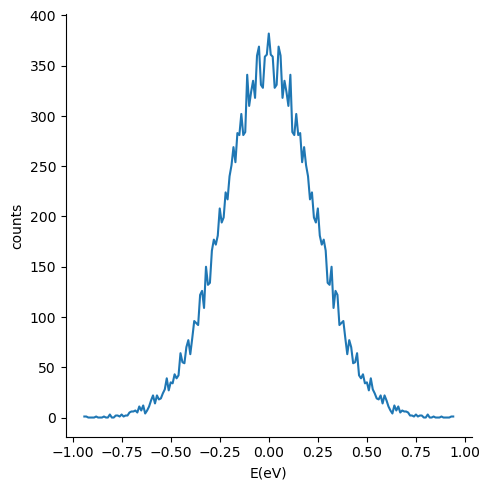

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
columns = ["E(eV)", "counts"] 
df = pd.read_table("eanalyze.pairhist_e.out", comment="#", sep='\s+',names=columns, skiprows=2) 
sns.relplot(x="E(eV)", y="counts", ci=None, kind="line", data=df) 
plt.plot()

## Couplings histrogram
In this step we will analyze the electron/hole couplings, using the `ianalyze` calculator using the `resolution_logJ2` parameter of 0.1 units. See the [ianalyze options and defaults](https://votca.github.io/xtp/ianalyze.html) for more information about the calculator.

In [5]:
!xtp_run -e ianalyze -c resolution_logJ2=0.1 states=e,h -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024-dev gitid: 9f20a12 (compiled Mar  8 2024, 05:10:35)

Initializing calculator
... ianalyze
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5
.... 
... ianalyze
 Using 1 threads
Calculating for state e now.
Calculating for state h now.
Changes have not been written to state file.


## Plotting the coupling histogram
We can now plot the logarithm of the squared coupling for the hole,

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15153/886975016.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table("ianalyze.ihist_h.out", comment="#", sep='\s+',names=columns, skiprows=2)
/usr/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


[]

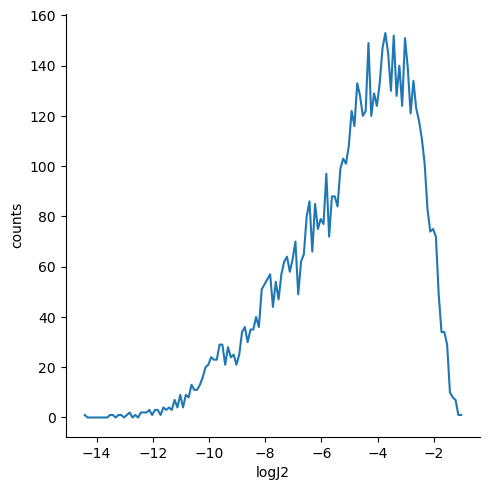

In [6]:
columns = ["logJ2", "counts"] 
df = pd.read_table("ianalyze.ihist_h.out", comment="#", sep='\s+',names=columns, skiprows=2) 
sns.relplot(x="logJ2", y="counts", ci=None, kind="line", data=df) 
plt.plot()

## KMC simulations of multiple holes or electrons in periodic boundary conditions
Finally, lets do a 1000 seconds KMC simulation for the electron, with a 10 seconds window between output and a field of 10 *V/m* along the x-axis,

In [7]:
!xtp_run -e kmcmultiple -c runtime=1000 outputtime=10 field=10,0,0 carriertype=electron -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024-dev gitid: 9f20a12 (compiled Mar  8 2024, 05:10:35)

Initializing calculator
... kmcmultiple
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5
.... 
... kmcmultiple
 Using 1 threads
 ... 
-----------------------------------
      KMC FOR MULTIPLE CHARGES
-----------------------------------

 ... 
Calculating initial rates.
 ... Rate engine initialized:
 Ratetype:marcus
 Temperature T[k] = 300
 Electric field[V/nm](x,y,z) =1e-08 0 0 ||F|| 1e-08

 ... 
 ...     carriertype: electron
 ...     Rates for 1000 sites are computed.
 ... 
Rates are written to rates.dat
 ... Nblist has 10151 pairs. Nodes contain 20302 jump events
with avg=20.302 std=2.07913 max=28 min=14 jumps per site
Minimum jumpdistance =0.366063 nm Maximum distance =1.10167 nm

 ... spatial carrier densi

You can find both the *occupation data* and the *rates* for the electron at 300 K, on files `occupation.dat`  and `rates.dat`, respectively.